In [18]:
# Importing required Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.impute import KNNImputer
from sklearn.metrics import DistanceMetric

import warnings

sns.set()
warnings.filterwarnings("ignore")
import json


In [19]:
with open(r'acn.json', 'r') as jf:
    ev = json.load(jf)
       
# Flatten data
df = pd.json_normalize(ev, record_path =['_items'])
df.head()

,_id,clusterID,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,5bc90cb9f9af8b0d7fe77cd2,0039,"Wed, 25 Apr 2018 11:08:04 GMT","Wed, 25 Apr 2018 13:20:10 GMT","Wed, 25 Apr 2018 13:21:10 GMT",7.932,2_39_78_362_2018-04-25 11:08:04.400812,0002,CA-496,2-39-78-362,America/Los_Angeles,None,None
1,5bc90cb9f9af8b0d7fe77cd3,0039,"Wed, 25 Apr 2018 13:45:10 GMT","Thu, 26 Apr 2018 00:56:16 GMT","Wed, 25 Apr 2018 16:44:15 GMT",10.013,2_39_95_27_2018-04-25 13:45:09.617470,0002,CA-319,2-39-95-27,America/Los_Angeles,None,None
2,5bc90cb9f9af8b0d7fe77cd4,0039,"Wed, 25 Apr 2018 13:45:50 GMT","Wed, 25 Apr 2018 23:04:45 GMT","Wed, 25 Apr 2018 14:51:44 GMT",5.257,2_39_79_380_2018-04-25 13:45:49.962001,0002,CA-489,2-39-79-380,America/Los_Angeles,None,None
3,5bc90cb9f9af8b0d7fe77cd5,0039,"Wed, 25 Apr 2018 14:37:06 GMT","Wed, 25 Apr 2018 23:55:34 GMT","Wed, 25 Apr 2018 16:05:22 GMT",5.177,2_39_79_379_2018-04-25 14:37:06.460772,0002,CA-327,2-39-79-379,America/Los_Angeles,None,None
4,5bc90cb9f9af8b0d7fe77cd6,0039,"Wed, 25 Apr 2018 14:40:34 GMT","Wed, 25 Apr 2018 23:03:12 GMT","Wed, 25 Apr 2018 17:40:30 GMT",10.119,2_39_79_381_2018-04-25 14:40:33.638896,0002,CA-490,2-39-79-381,America/Los_Angeles,None,None


In [20]:
df

,_id,clusterID,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,5bc90cb9f9af8b0d7fe77cd2,0039,"Wed, 25 Apr 2018 11:08:04 GMT","Wed, 25 Apr 2018 13:20:10 GMT","Wed, 25 Apr 2018 13:21:10 GMT",7.932,2_39_78_362_2018-04-25 11:08:04.400812,0002,CA-496,2-39-78-362,America/Los_Angeles,None,None
1,5bc90cb9f9af8b0d7fe77cd3,0039,"Wed, 25 Apr 2018 13:45:10 GMT","Thu, 26 Apr 2018 00:56:16 GMT","Wed, 25 Apr 2018 16:44:15 GMT",10.013,2_39_95_27_2018-04-25 13:45:09.617470,0002,CA-319,2-39-95-27,America/Los_Angeles,None,None
2,5bc90cb9f9af8b0d7fe77cd4,0039,"Wed, 25 Apr 2018 13:45:50 GMT","Wed, 25 Apr 2018 23:04:45 GMT","Wed, 25 Apr 2018 14:51:44 GMT",5.257,2_39_79_380_2018-04-25 13:45:49.962001,0002,CA-489,2-39-79-380,America/Los_Angeles,None,None
3,5bc90cb9f9af8b0d7fe77cd5,0039,"Wed, 25 Apr 2018 14:37:06 GMT","Wed, 25 Apr 2018 23:55:34 GMT","Wed, 25 Apr 2018 16:05:22 GMT",5.177,2_39_79_379_2018-04-25 14:37:06.460772,0002,CA-327,2-39-79-379,America/Los_Angeles,None,None
4,5bc90cb9f9af8b0d7fe77cd6,0039,"Wed, 25 Apr 2018 14:40:34 GMT","Wed, 25 Apr 2018 23:03:12 GMT","Wed, 25 Apr 2018 17:40:30 GMT",10.119,2_39_79_381_2018-04-25 14:40:33.638896,0002,CA-490,2-39-79-381,America/Los_Angeles,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31419,61550519f9af8b76960e169a,0039,"Mon, 13 Sep 2021 21:12:53 GMT","Tue, 14 Sep 2021 00:25:36 GMT","Mon, 13 Sep 2021 21:41:31 GMT",2.285,2_39_89_25_2021-09-13 21:12:53.318460,0002,CA-315,2-39-89-25,America/Los_Angeles,000000431,"[{'WhPerMile': 286, 'kWhRequested': 28.6, 'mil..."
31420,61550519f9af8b76960e169b,0039,"Mon, 13 Sep 2021 21:17:04 GMT","Tue, 14 Sep 2021 01:01:49 GMT","Mon, 13 Sep 2021 23:18:07 GMT",6.715,2_39_123_23_2021-09-13 21:16:44.026068,0002,CA-313,2-39-123-23,America/Los_Angeles,000006481,"[{'WhPerMile': 460, 'kWhRequested': 11.5, 'mil..."
31421,61550519f9af8b76960e169c,0039,"Mon, 13 Sep 2021 22:33:07 GMT","Mon, 13 Sep 2021 23:06:55 GMT",None,17.720,2_39_81_4550_2021-09-13 22:33:04.543952,0002,11900388,2-39-81-4550,America/Los_Angeles,000003905,"[{'WhPerMile': 300, 'kWhRequested': 30.0, 'mil..."
31422,61550519f9af8b76960e169d,0039,"Mon, 13 Sep 2021 23:11:12 GMT","Tue, 14 Sep 2021 01:43:11 GMT","Tue, 14 Sep 2021 00:13:35 GMT",2.018,2_39_91_437_2021-09-13 23:10:59.528292,0002,CA-317,2-39-91-437,America/Los_Angeles,000001082,"[{'WhPerMile': 290, 'kWhRequested': 5.8, 'mile..."


In [21]:
#Initial Data Preprocessing Steps
df_pre=df
def date_conversion(col):     
    date_connection_time = pd.to_datetime(df_pre[col], format="%a, %d %b %Y %X %Z")
    date_format_connect = date_connection_time.dt.tz_localize(None)
    connect_date = date_format_connect.dt.date
    df_pre[col] = connect_date
    df_pre[col]=df_pre[col].astype('datetime64[ns]')
df_pre['doneChargingTime'].fillna(df_pre['disconnectTime'],inplace=True) # Fill Null values
date_conversion('connectionTime')
date_conversion('disconnectTime')
date_conversion('doneChargingTime')
def ev_univ(input_col,pred_col):
    ev_univ = df_pre[[input_col,pred_col]]
    ev_univ_agg = ev_univ.groupby([input_col]).agg({pred_col:np.sum})
    return ev_univ_agg
uni_done = ev_univ('doneChargingTime','kWhDelivered')
uni_conn = ev_univ('connectionTime','kWhDelivered')
uni_disconn = ev_univ('disconnectTime','kWhDelivered')
uni_2=uni_disconn.reset_index()
df_1=uni_2
df_1

,disconnectTime,kWhDelivered
0,2018-04-25,151.103
1,2018-04-26,385.389
2,2018-04-27,409.963
3,2018-04-28,540.545
4,2018-04-29,267.643
...,...,...
1074,2021-09-10,393.768
1075,2021-09-11,315.598
1076,2021-09-12,179.279
1077,2021-09-13,368.374


In [22]:
#Importing Date Lookup table
      
# Flatten data
date_df = pd.read_csv(r'date_lookup.csv')
date_df.head()

,Date,Year,Month,Day
0,25-Apr-2018,2018,4,25
1,26-Apr-2018,2018,4,26
2,27-Apr-2018,2018,4,27
3,28-Apr-2018,2018,4,28
4,29-Apr-2018,2018,4,29


In [23]:
#Lookup Table processing
date_df['Date'] = date_df['Date'].astype('datetime64')
date_df.set_index('Date')
merge=pd.merge(date_df,df_1, how='left',left_on='Date',right_on='disconnectTime')
merge['day_of_week'] = merge['Date'].dt.weekday
merge["IsWeekend"] = merge["day_of_week"] >= 5
analy = merge[['Date','kWhDelivered']]
analy_weekend = merge[['Date','IsWeekend','kWhDelivered']]
analy_1=analy.set_index('Date')
analy_weekend_1=analy_weekend.set_index('Date')
#KNN Imputation
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
df = pd.DataFrame(imputer.fit_transform(analy_weekend_1),columns = analy_weekend_1.columns)
#Concatenating date lookup and source data
x1=pd.concat([analy_weekend,df], axis=1, ignore_index=True)
final=x1
final.drop(3,axis=1,inplace=True)
final.drop(2,axis=1,inplace=True)
final_df=final.rename(columns={0:'Date',1: "IsWeekend", 4: "kWhDelivered"})
uni_3=final_df
uni_3=uni_3.set_index('Date')
uni_3.index.freq = 'D'
uni_3_filter=uni_3['kWhDelivered']
uni_3.rename(columns={'kWhDelivered':'Kwh'},inplace=True)
uni_3_filter = uni_3
uni_3_filter = uni_3_filter.drop('IsWeekend',axis=1,inplace=True)
data=uni_3 # Data for forecastinng

In [24]:
data

,Kwh
Date,
2018-04-25,151.103
2018-04-26,385.389
2018-04-27,409.963
2018-04-28,540.545
2018-04-29,267.643
...,...
2021-09-10,393.768
2021-09-11,315.598
2021-09-12,179.279


In [25]:
data.describe()

,Kwh
count,1239.000000
mean,260.748749
std,202.854358
min,0.591000
25%,115.390500
50%,221.027400
75%,353.267006
max,1000.640991


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1239 entries, 2018-04-25 to 2021-09-14
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Kwh     1239 non-null   float64
dtypes: float64(1)
memory usage: 19.4 KB


In [27]:
data['Kwh_LastMonth']=data['Kwh'].shift(+1)

In [28]:
data

,Kwh,Kwh_LastMonth
Date,,
2018-04-25,151.103,NaN
2018-04-26,385.389,151.103
2018-04-27,409.963,385.389
2018-04-28,540.545,409.963
2018-04-29,267.643,540.545
...,...,...
2021-09-10,393.768,324.797
2021-09-11,315.598,393.768
2021-09-12,179.279,315.598


In [29]:
# Monthly Differencing:

data['Kwh_LastMonth']=data['Kwh'].shift(+30)
data['Kwh_2Monthsback']=data['Kwh'].shift(+60)
data['Kwh_3Monthsback']=data['Kwh'].shift(+90)
data

,Kwh,Kwh_LastMonth,Kwh_2Monthsback,Kwh_3Monthsback
Date,,,,
2018-04-25,151.103,NaN,NaN,NaN
2018-04-26,385.389,NaN,NaN,NaN
2018-04-27,409.963,NaN,NaN,NaN
2018-04-28,540.545,NaN,NaN,NaN
2018-04-29,267.643,NaN,NaN,NaN
...,...,...,...,...
2021-09-10,393.768,218.933619,60.204,249.773
2021-09-11,315.598,390.006000,137.419,140.868
2021-09-12,179.279,217.349000,121.167,147.451


In [30]:
data=data.dropna()
data

,Kwh,Kwh_LastMonth,Kwh_2Monthsback,Kwh_3Monthsback
Date,,,,
2018-07-24,784.648000,258.325000,597.663,151.103
2018-07-25,728.216000,590.850932,567.021,385.389
2018-07-26,634.460000,679.517022,292.759,409.963
2018-07-27,765.962000,574.992751,142.086,540.545
2018-07-28,699.176761,739.649000,479.316,267.643
...,...,...,...,...
2021-09-10,393.768000,218.933619,60.204,249.773
2021-09-11,315.598000,390.006000,137.419,140.868
2021-09-12,179.279000,217.349000,121.167,147.451


In [31]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)

In [32]:
import numpy as np
x1,x2,x3,y=data['Kwh_LastMonth'],data['Kwh_2Monthsback'],data['Kwh_3Monthsback'],data['Kwh'] # pandas dataframce
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y) # array
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3),axis=1)
print(final_x)

[[258.325      597.663      151.103     ]
 [590.8509325  567.021      385.389     ]
 [679.51702181 292.759      409.963     ]
 ...
 [217.349      121.167      147.451     ]
 [107.835      142.288      240.547     ]
 [290.553      124.344       89.475     ]]


In [33]:
X_train,X_test,y_train,y_test=final_x[:-30],final_x[-30:],y[:-30],y[-30:]

In [34]:
model.fit(X_train,y_train)

RandomForestRegressor(max_features=3, random_state=1)

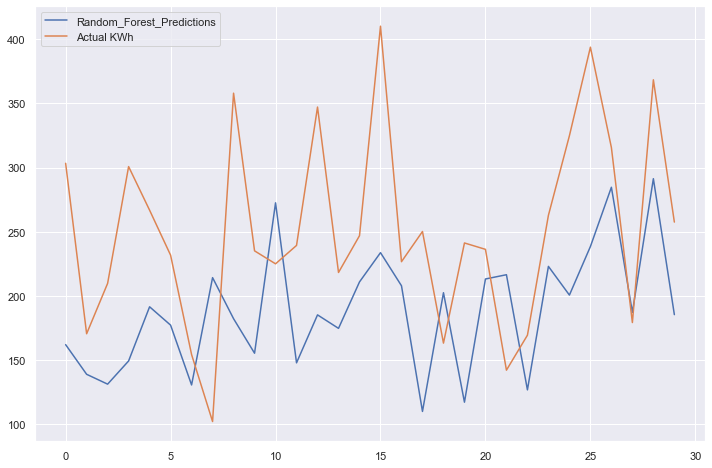

In [35]:
pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='Random_Forest_Predictions')
plt.plot(y_test,label='Actual KWh')
plt.legend(loc="upper left")
plt.show()

In [36]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_rf=sqrt(mean_squared_error(pred,y_test))


In [37]:
print('Mean Squared Error for Random Forest Model is:',rmse_rf)

Mean Squared Error for Random Forest Model is: 96.30184845943961


In [40]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor(objective='reg:squarederror')
model_xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

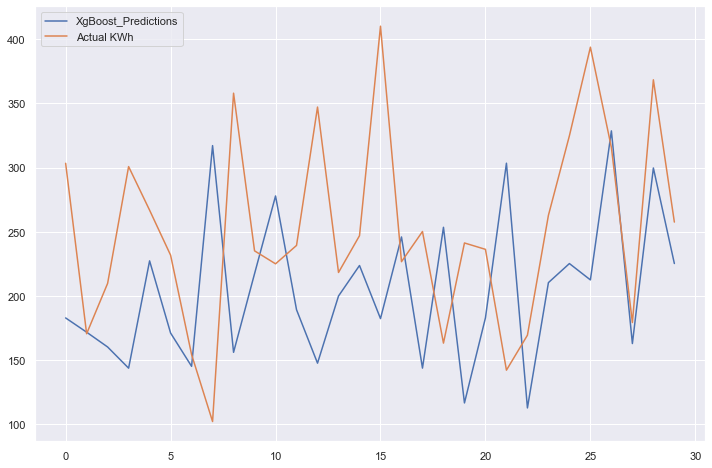

In [41]:
pred_xgb=model_xgb.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred_xgb,label='XgBoost_Predictions')
plt.plot(y_test,label='Actual KWh')
plt.legend(loc="upper left")
plt.show()

In [42]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_xgb=sqrt(mean_squared_error(pred_xgb,y_test))

In [43]:
print('Mean Squared Error for XGBoost Model is:',rmse_xgb)

Mean Squared Error for XGBoost Model is: 108.19775239096167
